<a href="https://colab.research.google.com/github/megumihoshino/machine-learning-fundamental/blob/main/imageclassify_TF_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#1st step, checked out the last version of TF
import  tensorflow as tf
print(tf.__version__)

2.15.0


In [2]:
#preparing and downloading dataset
!wget --no-check-certificate \
  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2024-05-06 04:44:10--  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip
Resolving dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)... 172.64.145.29, 104.18.42.227, 2606:4700:4400::ac40:911d, ...
Connecting to dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)|172.64.145.29|:443... connected.
HTTP request sent, awaiting response... 200 OK
Cookie coming from dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com attempted to set domain to digitaloceanspaces.com
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M  94.0MB/s    in 0.7s    

2024-05-06 04:44:11 (94.0 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [3]:
#extract file zip

import zipfile,os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [7]:
'''tiap direktori data latih dan data validasi msing2 memiliki sub-direktori
clean dan messy. tiap sub-direktori menyimpan gbr yg sesuai dg nama sub-direktori
tsb. jd, pd sub-direktori 'clean' terdpt gbr2 ruangan yg rapi dan pd sub-direktori
'messy' terdpt gbr2 ruangan yg berantakan.'''

os.listdir('/tmp/images/train')

['messy', 'clean']

In [8]:
os.listdir('/tmp/images/val')

['messy', 'clean']

In [9]:
#APPLY IMAGE DATA GENERATOR FOR DATA TRAIN N DATA VALIDATION
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale= 1./255,
    rotation_range=20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
    rescale=1./255
)

In [10]:
#PREPARING DATA TRAIN AND VALIDATION (dari data yg di-load di dlm memori)
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena ini merupakan masalah klasifikasi 2 kelas, gunakan class_mode = 'binary'
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
      validation_dir, #direktori data validasi
      target_size = (150,150), #resolusi seluruh gbr jd 150x150 pixel
      batch_size=4, #klasifikasi 2 kelas, pke class_mode = 'binary'
      class_mode = 'binary')


Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [11]:
#MEMBANGUN MODEL CNN (ada 4 lapis layer konvolusi dan max pooling)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation ='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])


In [12]:
#MENAMPILKAN SUMMARY DARI ARSITEKTUR YG TELAH DIBUAT
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [13]:
#compile model dg 'adam' optimizer loss function 'binary_crossentropy'

model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

'''
melakukan compile model tsb menggunakan fungsi compile(). pd tahap ini,
kita jg menentukan loss function serta optimizer yg akn digunakan. loss
funct yg digunakan pd kasus klasifikasi biner adlh 'adam optimizer'. adam
optimizer dipilih krn mudah diterapkan, lbh efisien scr komputasi dan
kebutuhan memori yg lbh kecil.'''

"\nmelakukan compile model tsb menggunakan fungsi compile(). pd tahap ini,\nkita jg menentukan loss function serta optimizer yg akn digunakan. loss\nfunct yg digunakan pd kasus klasifikasi biner adlh 'adam optimizer'. adam\noptimizer dipilih krn mudah diterapkan, lbh efisien scr komputasi dan\nkebutuhan memori yg lbh kecil."

In [14]:
#latih model dg model.fit

model.fit(
    train_generator,
    steps_per_epoch = 25, #brp batch yg akn dieksekusi pd setiap epoch
    epochs=25, #tmbhkan epochs jika akurasi model blm optimal
    validation_data=validation_generator, #menampilkan akurasi pengujian data validasi
    validation_steps=5, #brp batch yg akn dieksekusi pd setiap epoch
    verbose=2)


'''
stlh berhasil membuat model, kita tentu ingin menguji model tsb utk memprediksi
gbr baru (gbr yg blm dikenal oleh model sblmnya). potongan program berikut memungkinkan
kita scr interaktif memilih sebuah gbr. kemudian, gbr tsb akn diolah terlbh dahulu
sblm dimasukkan ke model utk diprediksi.
'''

Epoch 1/25
25/25 - 24s - loss: 0.7283 - accuracy: 0.5100 - val_loss: 0.6668 - val_accuracy: 0.5500 - 24s/epoch - 961ms/step
Epoch 2/25
25/25 - 14s - loss: 0.6974 - accuracy: 0.4900 - val_loss: 0.6934 - val_accuracy: 0.5000 - 14s/epoch - 570ms/step
Epoch 3/25
25/25 - 14s - loss: 0.6944 - accuracy: 0.4500 - val_loss: 0.6930 - val_accuracy: 0.5000 - 14s/epoch - 565ms/step
Epoch 4/25
25/25 - 14s - loss: 0.6934 - accuracy: 0.4500 - val_loss: 0.6928 - val_accuracy: 0.5000 - 14s/epoch - 569ms/step
Epoch 5/25
25/25 - 15s - loss: 0.6931 - accuracy: 0.5300 - val_loss: 0.6916 - val_accuracy: 0.5000 - 15s/epoch - 586ms/step
Epoch 6/25
25/25 - 15s - loss: 0.6958 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000 - 15s/epoch - 602ms/step
Epoch 7/25
25/25 - 14s - loss: 0.6936 - accuracy: 0.5400 - val_loss: 0.7026 - val_accuracy: 0.5000 - 14s/epoch - 564ms/step
Epoch 8/25
25/25 - 14s - loss: 0.6919 - accuracy: 0.5500 - val_loss: 0.6744 - val_accuracy: 0.5500 - 14s/epoch - 571ms/step
Epoch 9/

'\nstlh berhasil membuat model, kita tentu ingin menguji model tsb utk memprediksi\ngbr baru (gbr yg blm dikenal oleh model sblmnya). potongan program berikut memungkinkan\nkita scr interaktif memilih sebuah gbr. kemudian, gbr tsb akn diolah terlbh dahulu\nsblm dimasukkan ke model utk diprediksi.\n'

Saving 38.png to 38.png
1/1 [==============================] - 0s 44ms/step
38.png
clean


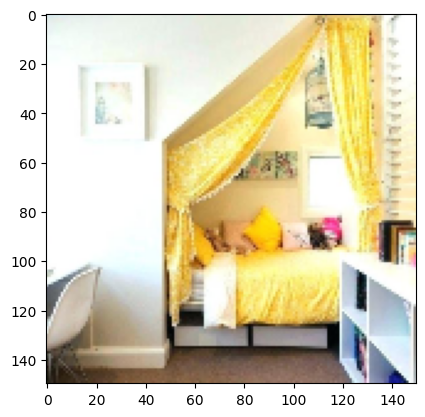

In [19]:
#menguji model tsb utk memprediksi gbr baru (gbr yg blm dikenal oleh sblmnya)

import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img= image.load_img(path, target_size=(150,150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes==0:
    print('clean')
  else:
    print('messy')
